In [1]:
# Import useful packages
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Load class indexes and labels...

# ... of dataset 1 (Latin alphabet)
ds1_class_index = np.loadtxt('Assig1-Dataset/info_1.csv', skiprows=1, usecols=0, delimiter=',', dtype=np.int32)
ds1_class_labels = np.loadtxt('Assig1-Dataset/info_1.csv', skiprows=1, usecols=1, delimiter=',', dtype=np.str)

# ... of dataset 2 (Greek alphabet)
ds2_class_index = np.loadtxt('Assig1-Dataset/info_2.csv', skiprows=1, usecols=0, delimiter=',', dtype=np.int32)
ds2_class_labels = np.loadtxt('Assig1-Dataset/info_2.csv', skiprows=1, usecols=1, delimiter=',', dtype=np.str)

In [3]:
def compute_dist(ds_class_index, filename, nb_pixels=32**2):
    '''
    Function used for calculating the number for occurences of a class in a given dataset

    ds_class_index: index array of shape (N, ) which represents the indexes of the dataset's class
    filename: name of the csv file containing the dataset
    '''
    distribution = np.zeros(ds_class_index.shape[0], dtype=np.int32)
    data_class = np.loadtxt(filename, usecols=nb_pixels, delimiter=',', dtype=np.int32)
    for i in data_class:
        distribution[i] += 1
    return distribution

In [9]:
# Get distributions for training, validation and test of Dataset 1
ds1_dist_training = compute_dist(ds1_class_index, 'Assig1-Dataset/train_1.csv')
ds1_dist_val = compute_dist(ds1_class_index, 'Assig1-Dataset/val_1.csv')
ds1_dist_test = compute_dist(ds1_class_index, 'Assig1-Dataset/test_with_label_1.csv')

# Get distributions for training, validation and test of Dataset 2
ds2_dist_training = compute_dist(ds2_class_index, 'Assig1-Dataset/train_2.csv')
ds2_dist_val = compute_dist(ds2_class_index, 'Assig1-Dataset/val_2.csv')
ds2_dist_test = compute_dist(ds2_class_index, 'Assig1-Dataset/test_with_label_2.csv')

In [4]:
# Functinos for plotting bar chart distribution

def autolabel(rects, ax):
    '''Attach a text label above each bar in *rects*, displaying its height.'''
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize='xx-small')

def plot_distribution(indexes, class_labels, distributions, title, width=0.25, font_size='xx-small'):
    '''
    Function to plot the distributions of each dataset by class labels

    indexes: Array of class indexes of the dataset of shape (N, )
    class_labels: Array of class labels of the dataset of shape (N, )
    distributions: Array of length 3. Each array entry is in the following order: training counts, validation counts, test counts (all counts are 1D arrays)
    title: Title of the bar chart
    width: Width of 1 bar
    font_size: Font size of the label on top of each bar
    '''

    # Generate all bars
    fig, ax = plt.subplots()
    rects_training = ax.bar(indexes - width, distributions[0], width, label='Training')
    rects_val = ax.bar(indexes, distributions[1], width, label='Validation')
    rects_test = ax.bar(indexes + width, distributions[2], width, label='Test')

    # Show counts for each bar 
    autolabel(rects_training, ax)
    autolabel(rects_val, ax)
    autolabel(rects_test, ax)

    # Configure bar chart
    ax.grid(b=True, axis='y')
    ax.set_title(title)
    ax.set_xlabel('Character')
    ax.set_ylabel('Count')
    ax.set_xticks(indexes)
    ax.set_xticklabels(class_labels)
    ax.legend()

    fig.tight_layout()

    plt.show()

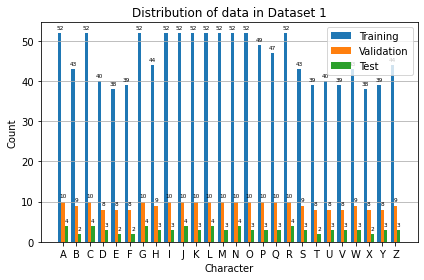

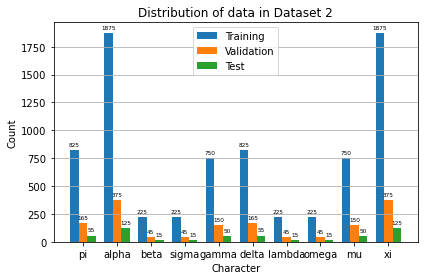

In [11]:
# Plot each distributions
plot_distribution(ds1_class_index, ds1_class_labels, [ds1_dist_training, ds1_dist_val, ds1_dist_test], 'Distribution of data in Dataset 1')

plot_distribution(ds2_class_index, ds2_class_labels, [ds2_dist_training, ds2_dist_val, ds2_dist_test], 'Distribution of data in Dataset 2')